In [39]:
# This example will explain about how to select the features using the RandomForest algorithm
# We are using the preprocessed data from breast_cancer-1

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

In [41]:
df = pd.read_csv("preprocessed.csv", sep=",")

In [42]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,36.0,1,0.080353,0.42638,0.54715,0.273680,3,1,1,1,0,1,1
1,43.0,1,-0.420320,0.57807,0.61447,-0.031505,2,2,1,1,0,2,0
2,69.0,1,0.213980,1.31140,-0.32747,-0.234260,3,1,1,1,0,3,1
3,56.0,1,0.345090,-0.21147,-0.19304,0.124270,2,1,1,1,0,1,1
4,56.0,1,0.221550,1.90680,0.52045,-0.311990,2,1,1,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,36.0,1,0.231800,0.61804,-0.55779,-0.517350,3,1,1,1,1,4,0
313,44.0,0,0.732720,1.11170,-0.26952,-0.354920,2,3,1,1,0,3,0
314,61.0,1,-0.719470,2.54850,-0.15024,0.339680,2,1,1,1,0,2,0
315,79.0,1,0.479400,2.05590,-0.53136,-0.188480,1,1,1,1,1,2,0


In [43]:
# list the number of columns, i.e. header
header_names = df.columns.to_list()

In [44]:
header_names

['Age',
 'Gender',
 'Protein1',
 'Protein2',
 'Protein3',
 'Protein4',
 'Tumour_Stage',
 'Histology',
 'ER status',
 'PR status',
 'HER2 status',
 'Surgery_type',
 'Patient_Status']

In [45]:
X = df[['Age',
 'Gender',
 'Protein1',
 'Protein2',
 'Protein3',
 'Protein4',
 'Tumour_Stage',
 'Histology',
 'ER status',
 'PR status',
 'HER2 status',
 'Surgery_type']].values

y = df[['Patient_Status']].values

In [46]:
cols = ['Age',
 'Gender',
 'Protein1',
 'Protein2',
 'Protein3',
 'Protein4',
 'Tumour_Stage',
 'Histology',
 'ER status',
 'PR status',
 'HER2 status',
 'Surgery_type']

In [47]:
# assign column names to variable X, this will help is showing the feature 
# names while dealing with RandomForest feature selection
X = pd.DataFrame(X, columns=[cols])

In [49]:
#initialize RandomForest classifier with 100 estimators
rf_classfiers = RandomForestClassifier(n_estimators=100, random_state=0)

In [50]:
#model fit
rf_classfiers.fit(X, y)

/tmp/ipykernel_1262/333073619.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classfiers.fit(X, y)


RandomForestClassifier(random_state=0)

In [51]:
# the feature scores are stored in feature rank
feature_rank = pd.Series(rf_classfiers.feature_importances_, index=X.columns).sort_values(ascending=False)

In [52]:
feature_rank = feature_rank.reset_index(name='count')
feature_rank

,level_0,count
0,Protein4,0.184239
1,Protein2,0.180216
2,Protein1,0.176989
3,Protein3,0.166872
4,Age,0.148607
5,Surgery_type,0.052902
6,Tumour_Stage,0.043940
7,Histology,0.028066
8,HER2 status,0.011403
9,Gender,0.006769


<Axes: xlabel='count', ylabel='level_0'>

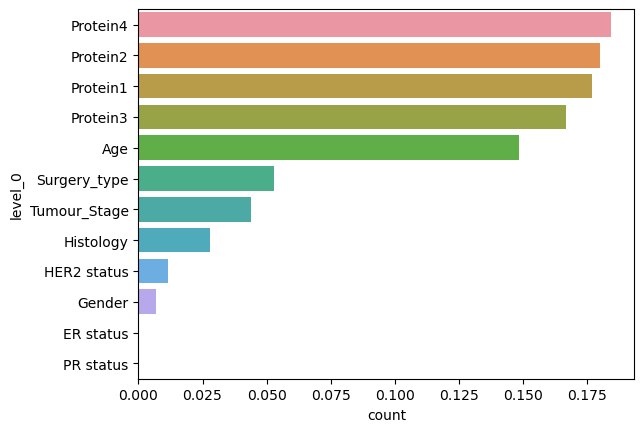

In [53]:
# level_0 column indicates the features(X colums)
sns.barplot(data=tmp_df, x="count", y="level_0", orient="h")

In [54]:
# from the above plot its clear that ER and PR status does not contribute well to achive model prediction. 
# We can drop these columns, lets load the data again (for better understanding), a fresh df 

df = pd.read_csv("preprocessed.csv", sep=",")

In [55]:
X = df[['Age',
 'Gender',
 'Protein1',
 'Protein2',
 'Protein3',
 'Protein4',
 'Tumour_Stage',
 'Histology',
 'HER2 status',
 'Surgery_type']].values

y = df[['Patient_Status']].values

In [56]:
X.shape

(317, 10)

In [57]:
#set up the layer
model = Sequential()
model.add(Dense(11, input_dim=10, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [58]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
model.fit(X, y, epochs=100, batch_size=16)

Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 0.5263 - accuracy: 0.7981
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5087 - accuracy: 0.8044
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5075 - accuracy: 0.8044
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5028 - accuracy: 0.8044
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.8044
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.8044
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.8044
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5061 - accuracy: 0.8044
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.8044
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5009 - accuracy: 0.8044
Epoch 11/

20/20 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.8044
Epoch 84/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.8044
Epoch 85/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.8044
Epoch 86/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.8044
Epoch 87/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.8044
Epoch 88/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.8044
Epoch 89/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.8044
Epoch 90/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.8044
Epoch 91/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.8044
Epoch 92/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.8044
Epoch 93/100


In [60]:
# well the accuracy is 80%. The model did not imporve the accuracy compared to previous example (breast_cancer-1)
# but we get to know about the junk features (ER and PR status).

# feature selection will play an important role, when you are dealing with large features,
# it will possiblly help in reduce your model creation time by not chosing the junk features. 